In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1= pd.read_excel("5104tables.xlsx", sheet_name = "heatmap")

In [4]:
model = df1['model'].dropna().unique()
datasets = df1['Dataset'].dropna().unique()

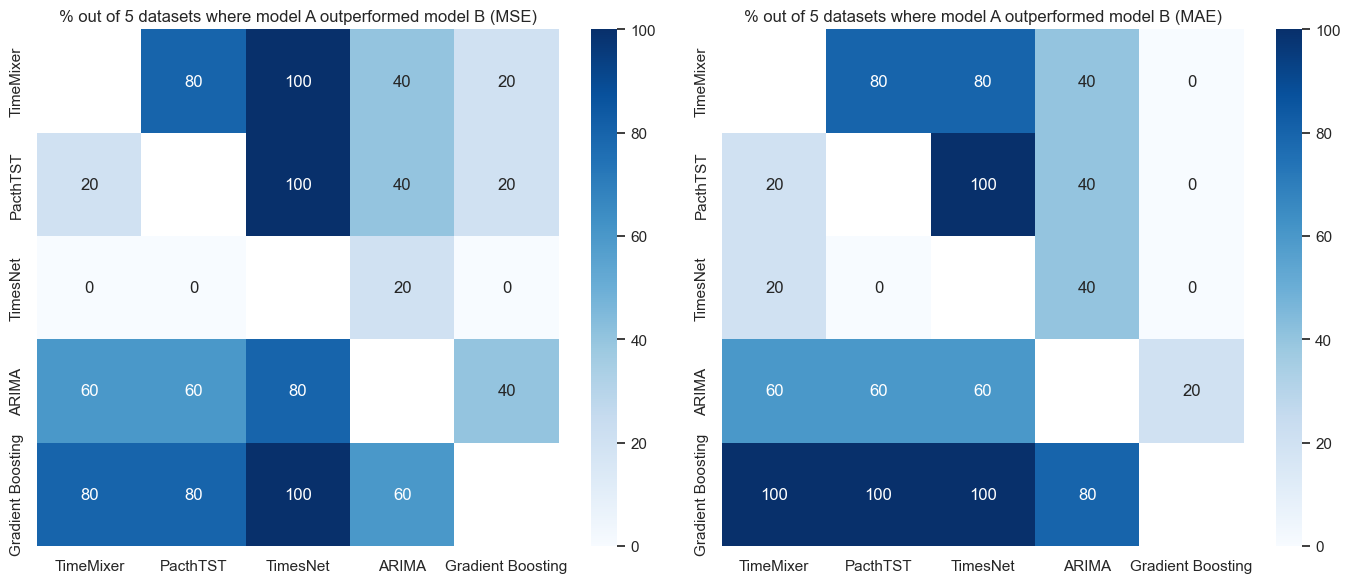

In [12]:
sns.set(style="white")

def calculate_win_rate(df, models, datasets, metric):
    win_matrix = pd.DataFrame(0, index=models, columns=models)

    for dataset in datasets:
        temp = df[df['Dataset'] == dataset]
        for model_a in models:
            row_a = temp[temp['model'] == model_a]
            if row_a.empty:
                continue
            value_a = row_a[metric].values[0]

            for model_b in models:
                row_b = temp[temp['model'] == model_b]
                if row_b.empty or model_a == model_b:
                    continue
                value_b = row_b[metric].values[0]

                if value_a < value_b:
                    win_matrix.loc[model_a, model_b] += 1

    win_matrix = (win_matrix / len(datasets)) * 100
    return win_matrix
    

win_matrix_mse = calculate_win_rate(df1, model, datasets, metric='MSE')
win_matrix_mae = calculate_win_rate(df1, model, datasets, metric='MAE')

np.fill_diagonal(win_matrix_mse.values, np.nan)
np.fill_diagonal(win_matrix_mae.values, np.nan)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cmap = sns.color_palette("Blues", as_cmap=True)

# MSE 
sns.heatmap(win_matrix_mse, annot=True, cmap=cmap, fmt='.0f', ax=axes[0])
axes[0].set_title('% out of 5 datasets where model A outperformed model B (MSE)')   
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# MAE 
sns.heatmap(win_matrix_mae, annot=True, cmap=cmap, fmt='.0f', ax=axes[1])
axes[1].set_title('% out of 5 datasets where model A outperformed model B (MAE)')


axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()
